# ASSIGNMENT 2(II)

## Importing necessary modules and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sn
%matplotlib inline

## Data Cleaning and Visualization

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
null_counts = df.isnull().sum() #Number of null-values in each column
null_counts

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
mapping = {'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3}
df['Species_Number'] = df['Species'].map(mapping)

In [7]:
df[df['Species'] == 'Iris-setosa'].head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_Number
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


In [8]:
df[df['Species'] == 'Iris-versicolor'].head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_Number
50,51,7.0,3.2,4.7,1.4,Iris-versicolor,2
51,52,6.4,3.2,4.5,1.5,Iris-versicolor,2
52,53,6.9,3.1,4.9,1.5,Iris-versicolor,2
53,54,5.5,2.3,4.0,1.3,Iris-versicolor,2
54,55,6.5,2.8,4.6,1.5,Iris-versicolor,2


In [9]:
df[df['Species'] == 'Iris-virginica'].head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_Number
100,101,6.3,3.3,6.0,2.5,Iris-virginica,3
101,102,5.8,2.7,5.1,1.9,Iris-virginica,3
102,103,7.1,3.0,5.9,2.1,Iris-virginica,3
103,104,6.3,2.9,5.6,1.8,Iris-virginica,3
104,105,6.5,3.0,5.8,2.2,Iris-virginica,3


In [10]:
df0 = df[df['Species'] == 'Iris-setosa']
df1 = df[df['Species'] == 'Iris-versicolor']
df2 = df[df['Species'] == 'Iris-virginica']

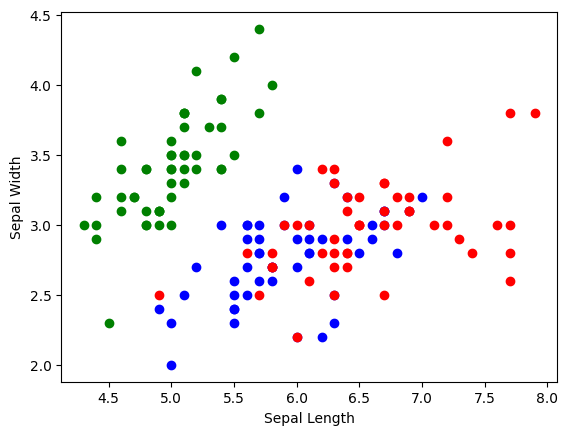

In [11]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['SepalLengthCm'], df0['SepalWidthCm'], color='green')
plt.scatter(df1['SepalLengthCm'], df1['SepalWidthCm'], color='blue')
plt.scatter(df2['SepalLengthCm'], df2['SepalWidthCm'], color='red')

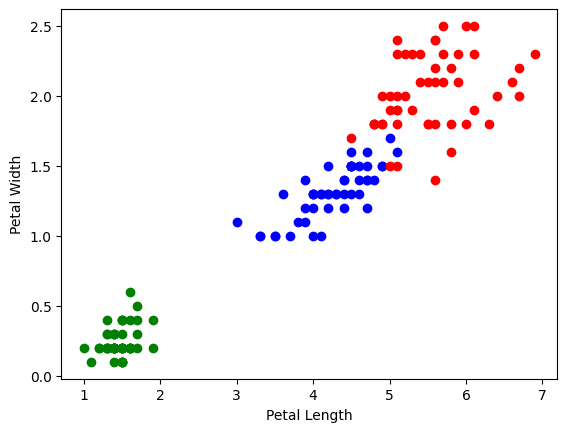

In [12]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['PetalLengthCm'], df0['PetalWidthCm'], color='green')
plt.scatter(df1['PetalLengthCm'], df1['PetalWidthCm'], color='blue')
plt.scatter(df2['PetalLengthCm'], df2['PetalWidthCm'], color='red')

## Train-Test Split

In [13]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y = df['Species_Number'].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [15]:
len(X_train)

105

In [16]:
len(X_test)

45

## KNN Classifier (Scratch)

In [17]:
class KNN:
  def __init__(self, k=3):
    self.k = k
  def fit(self, X, y):
    self.X_train = X
    self.y_train = y
  def predict(self, X):
    predictions = [self._predict(x) for x in X]
    return np.array(predictions)
  def _predict(self, x):
    distances = [np.linalg.norm(x - x_train) for x_train in X_train]
    k_indices = np.argsort(distances)[:self.k]
    k_nearest_labels = [self.y_train[i] for i in k_indices]
    most_common = Counter(k_nearest_labels).most_common(1)
    return most_common[0][0]

In [18]:
k = 10
knn_classifier = KNN(k)
knn_classifier.fit(X_train, y_train)
predictions = knn_classifier.predict(X_test)

In [19]:
cm1 = confusion_matrix(y_test, predictions)
cm1

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 13]])

Text(58.222222222222214, 0.5, 'Truth')

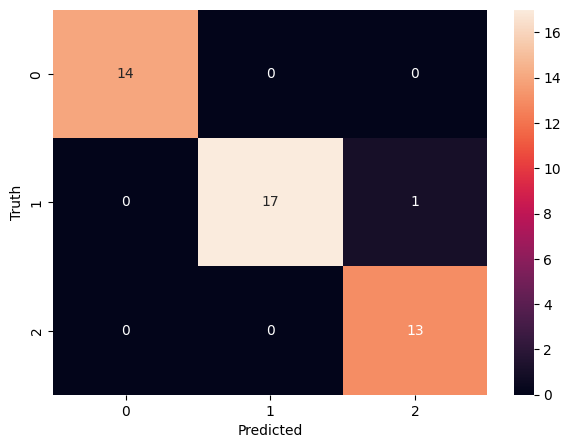

In [20]:
plt.figure(figsize=(7,5))
sn.heatmap(cm1, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [21]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.94      0.97        18
           3       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## KNN Classifier(Scikit-Learn)

In [22]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [24]:
cm2 = confusion_matrix(y_test, y_pred)
cm2

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 13]])

Text(58.222222222222214, 0.5, 'Truth')

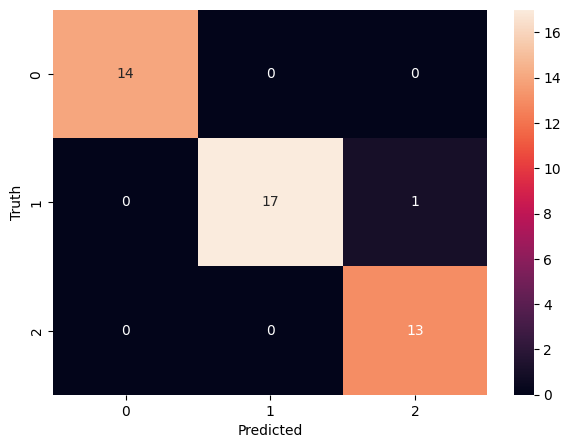

In [25]:
plt.figure(figsize=(7,5))
sn.heatmap(cm2, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.94      0.97        18
           3       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

